## Loading Packages and Data

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
%matplotlib inline

## Data Structure and Content

In [415]:
data = pd.read_csv("Train.csv")

testData = pd.read_csv("Test.csv")

## Data Analysis

#### Explore Data

In [416]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Explore Missing Values

In [417]:
null_check = data.isnull().sum()

null_check

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Explore Unique Values

In [418]:
for col in data:
    u = data[col].unique()
    if len(u) <= 10:
        print(f'{col}: ',u)
        print("Count = ",len(u))

Item_Fat_Content:  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Count =  5
Outlet_Identifier:  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Count =  10
Outlet_Establishment_Year:  [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Count =  9
Outlet_Size:  ['Medium' nan 'High' 'Small']
Count =  4
Outlet_Location_Type:  ['Tier 1' 'Tier 3' 'Tier 2']
Count =  3
Outlet_Type:  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Count =  4


#### Explore Effective Features

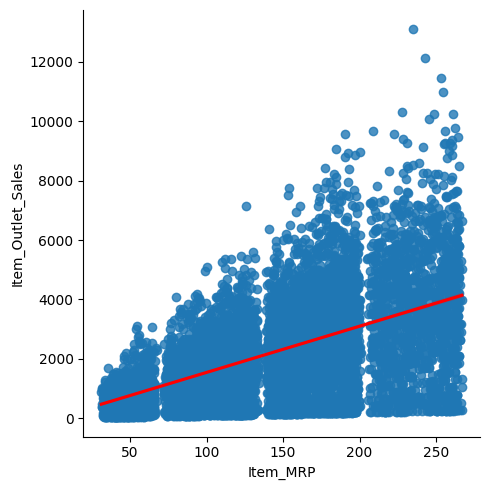

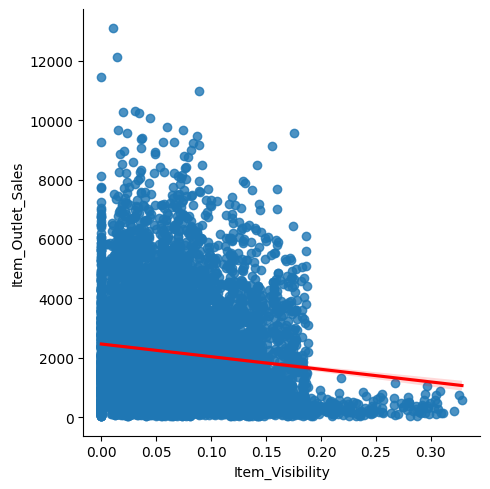

In [419]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=data,line_kws={'color': 'red'})
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',data=data,line_kws={'color': 'red'})

#### Explore Outliers 

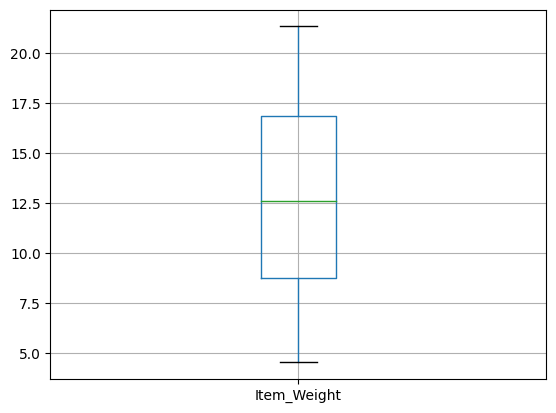

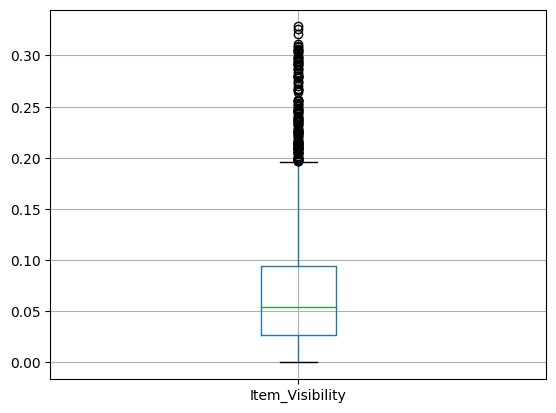

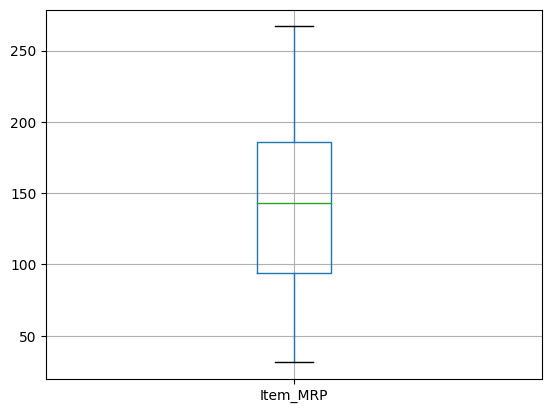

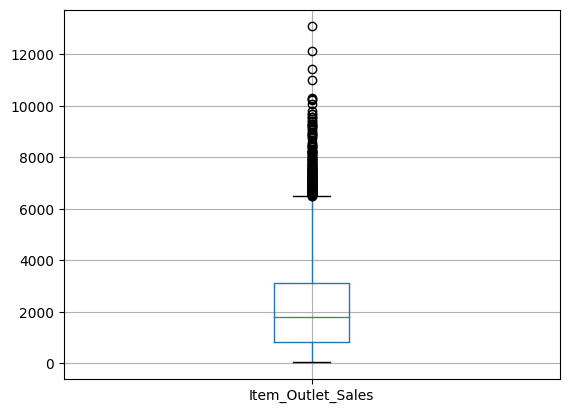

In [420]:
columns_to_check = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]

for col in columns_to_check:
    data.boxplot(column= [col])
    plt.show()

# Data Cleaning

### Fill Null Values
###### Outlet_Size, Item_Weight

In [421]:
data['Outlet_Size'].fillna(method='ffill', inplace=True)

data["Item_Weight"].fillna(testData["Item_Weight"].mean(), inplace=True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Clean Item_Fat_Content Column

In [422]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(['low fat', 'LF'], 'Low Fat')

# Replace variations of "regular" with "Regular"

data["Item_Fat_Content"] = data["Item_Fat_Content"].replace('reg', 'Regular')

data["Item_Fat_Content"].unique()


array(['Low Fat', 'Regular'], dtype=object)

### Feature Normalization

In [423]:
def featureNormalization(dataset, column, a, b):
    X = np.array(dataset[column])

    Normalized_X =((X-min(X))/(max(X)-min(X)))*(b-a)+a
    Normalized_X = pd.DataFrame(Normalized_X)
    dataset.insert(loc=dataset.columns.get_loc(column) + 1, column=column + ' (NORMALIZED)', value=Normalized_X)
    dataset = dataset.drop(columns=[column])

    return dataset

data = featureNormalization(data, "Item_Weight", 0, 1)
data = featureNormalization(data, "Item_MRP", 0, 1)

data

,Item_Identifier,Item_Weight (NORMALIZED),Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP (NORMALIZED),Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,0.282525,Low Fat,0.016047,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,0.081274,Regular,0.019278,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,0.770765,Low Fat,0.016760,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,0.871986,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,0.260494,Low Fat,0.000000,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0.137541,Low Fat,0.056783,Snack Foods,0.777729,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,0.227746,Regular,0.046982,Baking Goods,0.326263,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,0.359929,Low Fat,0.035186,Health and Hygiene,0.228492,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,0.158083,Regular,0.145221,Snack Foods,0.304939,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Encoding

### 1. Label Encoding
###### Item_Type, Outlet_Identifier, Outlet_Establishment_Year


In [424]:
def LabelEncode(df, colName):

    label_encoder = LabelEncoder()
    encoded = label_encoder.fit_transform(df[colName])
    df[colName] = encoded
    print(colName)
    print("Classes: ", label_encoder.classes_, "\n")

LabelEncode(data, "Item_Identifier")
LabelEncode(data, "Item_Type")
LabelEncode(data, "Outlet_Identifier")
LabelEncode(data, "Outlet_Establishment_Year")

Item_Identifier
Classes:  ['DRA12' 'DRA24' 'DRA59' ... 'NCZ42' 'NCZ53' 'NCZ54'] 

Item_Type
Classes:  ['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods'] 

Outlet_Identifier
Classes:  ['OUT010' 'OUT013' 'OUT017' 'OUT018' 'OUT019' 'OUT027' 'OUT035' 'OUT045'
 'OUT046' 'OUT049'] 

Outlet_Establishment_Year
Classes:  [1985 1987 1997 1998 1999 2002 2004 2007 2009] 



### 2. One Hot Encoding
###### Item_Fat_Content, Outlet_Size, Outlet_Location_Type, Outlet_Type

In [425]:
def oneHotEncodeing(df, colName):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    col = df[colName]
    encoded_columns = encoder.fit_transform(col.values.reshape(len(col), 1))
    encoded_columns = pd.DataFrame(encoded_columns)

    for i in range(len(encoded_columns.columns)):
        df.insert(loc=df.columns.get_loc(colName) + (i+ 1), column= colName + ' (HotEncoded) ' + str(encoded_columns.columns[i]), value=encoded_columns[i])
        
    df.drop(colName, axis=1, inplace=True) 


colToEncode = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

for c in colToEncode:
    oneHotEncodeing(data, c)
    

data

,Item_Identifier,Item_Weight (NORMALIZED),Item_Fat_Content (HotEncoded) 0,Item_Fat_Content (HotEncoded) 1,Item_Visibility,Item_Type,Item_MRP (NORMALIZED),Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size (HotEncoded) 0,Outlet_Size (HotEncoded) 1,Outlet_Size (HotEncoded) 2,Outlet_Location_Type (HotEncoded) 0,Outlet_Location_Type (HotEncoded) 1,Outlet_Location_Type (HotEncoded) 2,Outlet_Type (HotEncoded) 0,Outlet_Type (HotEncoded) 1,Outlet_Type (HotEncoded) 2,Outlet_Type (HotEncoded) 3,Item_Outlet_Sales
0,156,0.282525,1.0,0.0,0.016047,4,0.927507,9,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3735.1380
1,8,0.081274,0.0,1.0,0.019278,14,0.072068,3,8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,443.4228
2,662,0.770765,1.0,0.0,0.016760,10,0.468288,9,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2097.2700
3,1121,0.871986,0.0,1.0,0.000000,6,0.640093,0,3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,732.3800
4,1297,0.260494,1.0,0.0,0.000000,9,0.095805,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,0.137541,1.0,0.0,0.056783,13,0.777729,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2778.3834
8519,897,0.227746,0.0,1.0,0.046982,0,0.326263,7,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,549.2850
8520,1357,0.359929,1.0,0.0,0.035186,8,0.228492,6,6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1193.1136
8521,681,0.158083,0.0,1.0,0.145221,13,0.304939,3,8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1845.5976


# Remove Outliers
#### Item_Outlet_Sales

In [426]:
Q1 = data.Item_Outlet_Sales.quantile(0.25)
Q3 = data.Item_Outlet_Sales.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter out the outliers
data = data[(data.Item_Outlet_Sales >= lower_bound) & (data.Item_Outlet_Sales <= upper_bound)]

#### Item_Visiblity

C:\Users\George Saeid\AppData\Local\Temp\ipykernel_28140\2283827731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['z_score'] = (data['Item_Visibility'] - mean) / std_dev


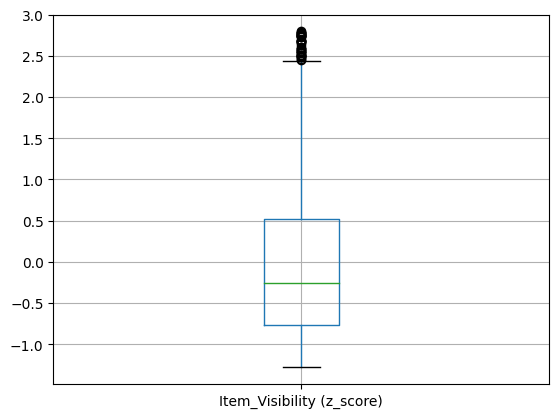

In [427]:
mean = data['Item_Visibility'].mean()
std_dev = data['Item_Visibility'].std()

# Calculate z-scores for each data point
data['z_score'] = (data['Item_Visibility'] - mean) / std_dev

# Define the threshold for outliers
threshold = 2.8


#data = data[abs(data['z_score']) <= threshold]
data = data.drop(data[data['z_score'] >= threshold].index)

data.insert(loc=data.columns.get_loc("Item_Visibility") + 1, column= "Item_Visibility (z_score)", value=data["z_score"])

data = data.drop(columns=["Item_Visibility", "z_score"])


data.boxplot(column= ["Item_Visibility (z_score)"])
plt.show()

# Modeling

In [428]:
features_X = data.iloc[:,0:11]


Y = data.loc[features_X.index, "Item_Outlet_Sales"]


features_X

,Item_Identifier,Item_Weight (NORMALIZED),Item_Fat_Content (HotEncoded) 0,Item_Fat_Content (HotEncoded) 1,Item_Visibility (z_score),Item_Type,Item_MRP (NORMALIZED),Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size (HotEncoded) 0,Outlet_Size (HotEncoded) 1
0,156,0.282525,1.0,0.0,-0.970535,4,0.927507,9,4,0.0,1.0
1,8,0.081274,0.0,1.0,-0.908208,14,0.072068,3,8,0.0,1.0
2,662,0.770765,1.0,0.0,-0.956785,10,0.468288,9,4,0.0,1.0
3,1121,0.871986,0.0,1.0,-1.280103,6,0.640093,0,3,0.0,1.0
4,1297,0.260494,1.0,0.0,-1.280103,9,0.095805,1,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,0.137541,1.0,0.0,-0.184698,13,0.777729,1,1,1.0,0.0
8519,897,0.227746,0.0,1.0,-0.373768,0,0.326263,7,5,1.0,0.0
8520,1357,0.359929,1.0,0.0,-0.601327,8,0.228492,6,6,0.0,0.0
8521,681,0.158083,0.0,1.0,1.521339,13,0.304939,3,8,0.0,1.0


In [429]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8225, dtype: float64

In [430]:
testData["Item_Fat_Content"] = testData["Item_Fat_Content"].replace(['low fat', 'LF'], 'Low Fat')
testData["Item_Fat_Content"] = testData["Item_Fat_Content"].replace('reg', 'Regular')

testData['Outlet_Size'].fillna(method='ffill', inplace=True)
testData["Item_Weight"].fillna(testData["Item_Weight"].mean(), inplace=True)


LabelEncode(testData, "Item_Identifier")
LabelEncode(testData, "Item_Type")
LabelEncode(testData, "Outlet_Identifier")
LabelEncode(testData, "Outlet_Establishment_Year")

testData = featureNormalization(testData, "Item_Weight", 0, 1)
testData = featureNormalization(testData, "Item_MRP", 0, 1)

colToEncode = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

for c in colToEncode:
    oneHotEncodeing(testData, c)

testData

Item_Identifier
Classes:  ['DRA12' 'DRA24' 'DRA59' ... 'NCZ42' 'NCZ53' 'NCZ54'] 

Item_Type
Classes:  ['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods'] 

Outlet_Identifier
Classes:  ['OUT010' 'OUT013' 'OUT017' 'OUT018' 'OUT019' 'OUT027' 'OUT035' 'OUT045'
 'OUT046' 'OUT049'] 

Outlet_Establishment_Year
Classes:  [1985 1987 1997 1998 1999 2002 2004 2007 2009] 



,Item_Identifier,Item_Weight (NORMALIZED),Item_Fat_Content (HotEncoded) 0,Item_Fat_Content (HotEncoded) 1,Item_Visibility,Item_Type,Item_MRP (NORMALIZED),Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size (HotEncoded) 0,Outlet_Size (HotEncoded) 1,Outlet_Size (HotEncoded) 2,Outlet_Location_Type (HotEncoded) 0,Outlet_Location_Type (HotEncoded) 1,Outlet_Location_Type (HotEncoded) 2,Outlet_Type (HotEncoded) 0,Outlet_Type (HotEncoded) 1,Outlet_Type (HotEncoded) 2,Outlet_Type (HotEncoded) 3
0,1103,0.964275,1.0,0.0,0.007565,13,0.323413,9,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1067,0.222983,0.0,1.0,0.038428,4,0.235849,2,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1406,0.598095,1.0,0.0,0.099575,11,0.894140,0,3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,809,0.164335,1.0,0.0,0.015388,13,0.524488,2,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1184,0.484706,0.0,1.0,0.118599,4,0.862069,5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,0.353974,0.0,1.0,0.013496,13,0.466011,8,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5677,306,0.181304,0.0,1.0,0.142991,15,0.584637,3,8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5678,1412,0.324204,1.0,0.0,0.073529,8,0.369798,7,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5679,517,0.639774,0.0,1.0,0.000000,3,0.778487,2,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Correlation

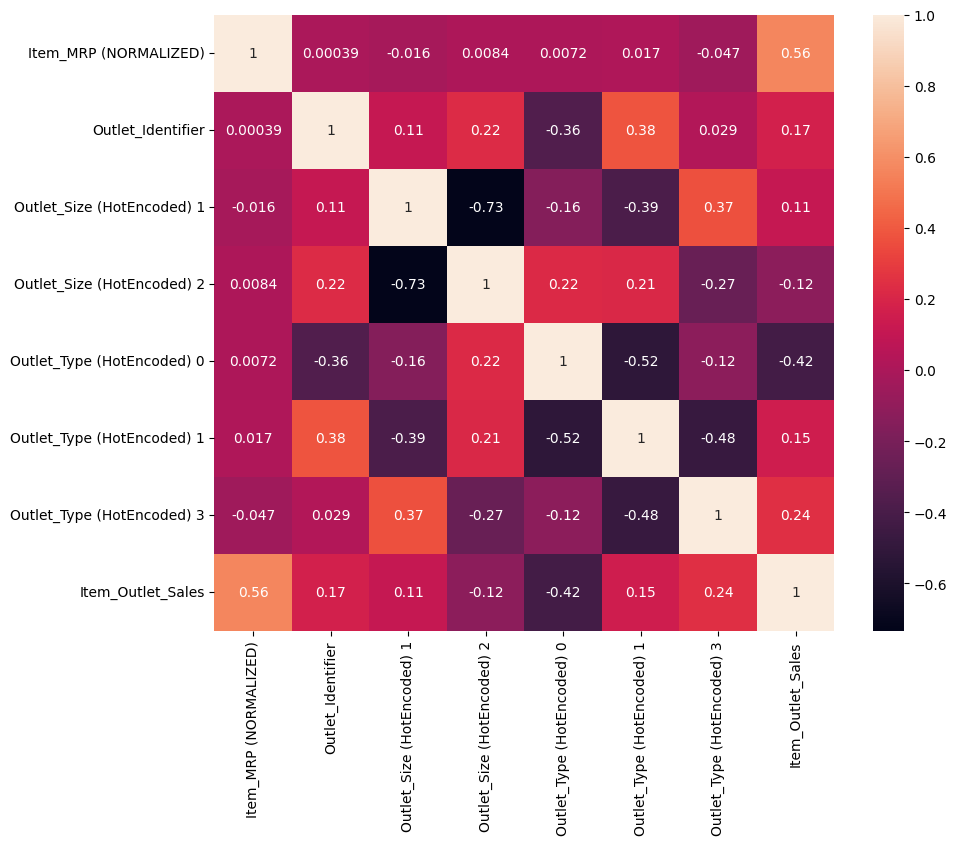

,Item_MRP (NORMALIZED),Outlet_Identifier,Outlet_Size (HotEncoded) 1,Outlet_Size (HotEncoded) 2,Outlet_Type (HotEncoded) 0,Outlet_Type (HotEncoded) 1,Outlet_Type (HotEncoded) 3,Item_Outlet_Sales
Item_MRP (NORMALIZED),1.000000,0.000391,-0.015847,0.008446,0.007202,0.016505,-0.047259,0.560840
Outlet_Identifier,0.000391,1.000000,0.109613,0.221721,-0.363485,0.377460,0.029166,0.170271
Outlet_Size (HotEncoded) 1,-0.015847,0.109613,1.000000,-0.732864,-0.155725,-0.387702,0.365568,0.113201
Outlet_Size (HotEncoded) 2,0.008446,0.221721,-0.732864,1.000000,0.220125,0.211486,-0.267912,-0.123449
Outlet_Type (HotEncoded) 0,0.007202,-0.363485,-0.155725,0.220125,1.000000,-0.519352,-0.122736,-0.424609
Outlet_Type (HotEncoded) 1,0.016505,0.377460,-0.387702,0.211486,-0.519352,1.000000,-0.476203,0.151115
Outlet_Type (HotEncoded) 3,-0.047259,0.029166,0.365568,-0.267912,-0.122736,-0.476203,1.000000,0.243851
Item_Outlet_Sales,0.560840,0.170271,0.113201,-0.123449,-0.424609,0.151115,0.243851,1.000000


In [431]:
corr = data.corr()



top_ones=corr.index[abs(corr['Item_Outlet_Sales'])>=0.09]
plt.subplots(figsize=(10, 8))
top_corr=data[top_ones].corr()
sns.heatmap(top_corr,annot=True)
plt.show()

top_ones=top_ones.delete(-1)


features_X = data[top_ones]
test_XData = testData[top_ones]
data
top_corr


# Clean Test.csv

## Train-Test Split

In [432]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(features_X, Y, test_size=0.2, shuffle=False)

# 1. Linear Rgression

In [433]:
Lr = LinearRegression()
Lr.fit(X_Train, Y_Train)

Y_pred = Lr.predict(X_Test)

mse = mean_squared_error(Y_Test, Y_pred)
mae = mean_absolute_error(Y_Test, Y_pred)

print("Linear Regression:", "\n\tMSE: " , mse)
print("\tMAE: " , mae)

Res = Lr.predict(test_XData)



Linear Regression: 
	MSE:  1014492.9556583174
	MAE:  774.4043502957144


# 2. Regularized Linear

In [434]:
Lr = LinearRegression()
Lr.fit(X_Train, Y_Train)

Y_pred = Lr.predict(X_Test)

mse = mean_squared_error(Y_Test, Y_pred)
mae = mean_absolute_error(Y_Test, Y_pred)

print("Linear Regression:", "\n\tMSE: " , mse)
print("\tMAE: " , mae)

Res2 = Lr.predict(test_XData)

Linear Regression: 
	MSE:  1014492.9556583174
	MAE:  774.4043502957144


# 3. Random Forest

In [435]:
Rf = RandomForestRegressor(n_estimators=100, random_state=30)

Rf.fit(X_Train, Y_Train)

Y_pred = Rf.predict(X_Test)

mse = mean_squared_error(Y_Test, Y_pred)


print("Random Forest Regression:", "\n\tMSE: " , mse)
print("\tMAE: " , mae)

Res3 = Rf.predict(test_XData)



Random Forest Regression: 
	MSE:  1282692.8891069486
	MAE:  774.4043502957144


# 4. XGBoost

In [436]:
Xg = XGBRegressor(n_estimators=10, learning_rate=0.502,n_jobs=5)
Xg.fit(X_Train, Y_Train)

Y_pred = Xg.predict(X_Test)

mse = mean_squared_error(Y_Test, Y_pred)
mae = mean_absolute_error(Y_Test, Y_pred)

print("XGBRegressor:", "\n\tMSE: " , mse)
print("\tMAE: " , mae)


Res4 = Xg.predict(test_XData)


XGBRegressor: 
	MSE:  979628.4693473849
	MAE:  717.643578137527
